


# Fixed Income and Credit
# Master in Computational Finance (MCF)

# 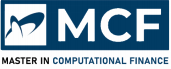

## Final Exam

**Professor**: N. Vasiljevic

## Fixed Income Derivatives



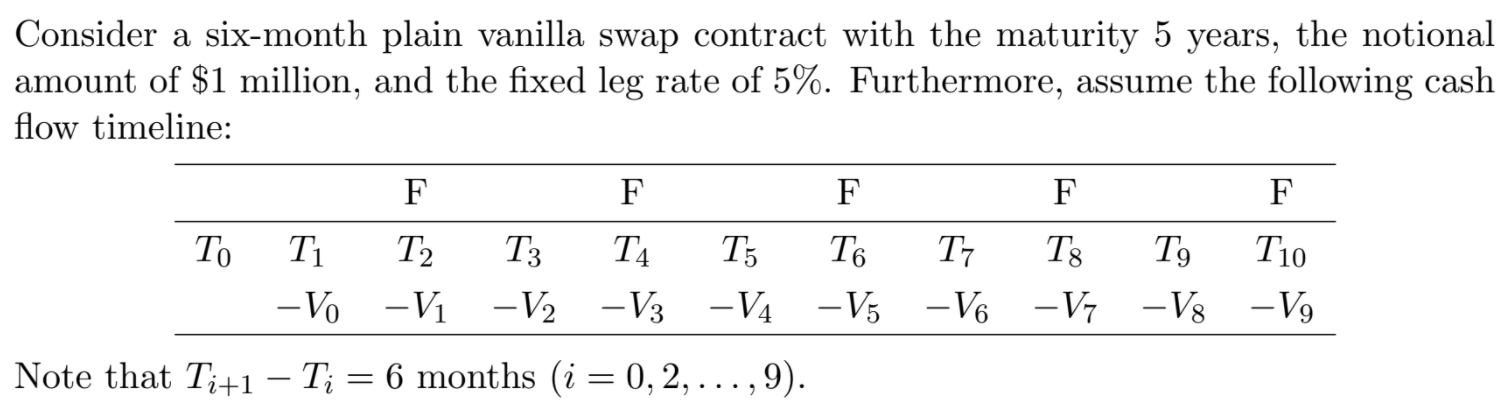

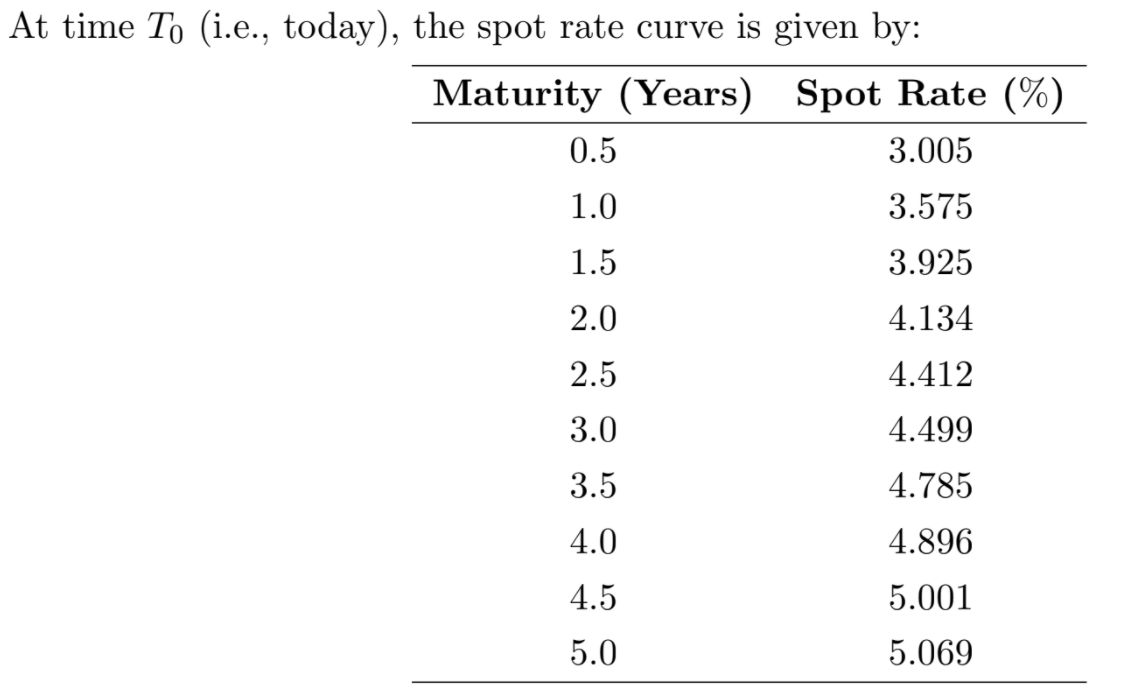

Importing libraries:

In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from sympy import Symbol, Array, solve

#### (a) What is the pricing formula for this plain vanilla swap using the zero-coupon method?

$Swap Price = V_{fixed} - V_{floating}$

$V_{fixed} = \sum_{i = 0}^{T} \frac{C}{(1 + spotRates[i]) ^ {maturity[i]}} + \frac{C +NotionalAmount}{(1 + r_T)^T}$

$V_{floating} = \sum_{i = 0}^{T} \frac{NotionalAmount * spotRates[i]}{(1 + spotRates[i]) ^ {maturity[i]}} + \frac{NotionalAmount}{(1 + r_T)^T}$

#### (b) Calculate the swap price.

In [ ]:
spot_rates = np.array([3.005, 3.575, 3.925, 4.134, 4.412, 4.499, 4.785, 4.896, 5.001, 5.069])/100
maturity_years = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

swap_rate = 0.05
face_value = 1000000
years_to_maturity = 5 

In [ ]:
fixedLegValue = [face_value * swap_rate for i in range(years_to_maturity * 2)]
fixedLegValue[-1] += face_value
fixedLegCashFlows = [fv * np.exp(-rate * year) for fv, year, rate in zip(fixedLegValue, maturity_years, spot_rates)]
fixedLegValue = sum(fixedLegCashFlows)

print("Value of the fixed leg is {:.2f}$".format(fixedLegValue))

Value of the fixed leg is 1217382.90$


In [ ]:
flaotingLegValue = [face_value * rate for rate in spot_rates]
flaotingLegValue[-1] = face_value
flaotingLegCashFlows = [fv * np.exp(-rate * year) for fv, year, rate in zip(flaotingLegValue, maturity_years, spot_rates)]
flaotingLegValue = sum(flaotingLegCashFlows)

print("Value of the floating leg is {:.2f}$".format(flaotingLegValue))

Value of the floating leg is 1114757.88$


In [ ]:
bondPrice = fixedLegValue - flaotingLegValue
print("Bond price is {:.2f}$".format(bondPrice))

Bond price is 102625.02$


#### (c) What is the swap rate such that the price of this swap is zero at time T0?

For the swap price to be zero, values of fixed and floating legs need to be the same. So the following equation is in place:

$V_{fixed} = V_{floating}$

$\sum_{i = 0}^{T} \frac{C}{(1 + spotRates[i]) ^ {maturity[i]}} + \frac{C +NotionalAmount}{(1 + r_T)^T} = \sum_{i = 0}^{T} \frac{NotionalAmount * spotRates[i]}{(1 + spotRates[i]) ^ {maturity[i]}} + \frac{NotionalAmount}{(1 + r_T)^T}$

The price of the floating-coupon bond is given by the spot rates and it's $1114757$$, and from here we can simply calculate the swap rate.

$\sum_{i = 0}^{T} \frac{$1m * X}{(1 + spotRates[i]) ^ {maturity[i]}} + \frac{$1m * (1+X)}{(1 + r_T)^T} = 1114757$$

In [ ]:
X, i = sp.symbols('X i')
spot_rates = Array(spot_rates)
maturity_years = Array(maturity_years)

eq = sp.summation((1_000_000*X)**(-spot_rates[i]*maturity_years[i]), (i, 0, 9)) + (1_000_000*(1+X))**(-spot_rates[-1]*maturity_years[-1])

s = solve(eq - 1114757, X)

print("In order for the price to be 0, the swap rate should be {:f}%".format(s[0]*100))
#s = 0.0383715

In order for the price to be 0, the swap rate should be 3.837150%


Checking:

In [ ]:
spot_rates = np.array([3.005, 3.575, 3.925, 4.134, 4.412, 4.499, 4.785, 4.896, 5.001, 5.069])/100
maturity_years = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

calculated_swap_rate = 0.0383715
face_value = 1000000
years_to_maturity = 5

floatingLegValue = 1154099

fixedLegValue = [face_value * calculated_swap_rate for i in range(years_to_maturity * 2)]
fixedLegValue[-1] += face_value
fixedLegCashFlows = [fv * np.exp(-rate * year) for fv, year, rate in zip(fixedLegValue, maturity_years, spot_rates)]
fixedLegValue = sum(fixedLegCashFlows)

bondPrice = fixedLegValue - flaotingLegValue

print(bondPrice)

0.1693391497246921
